In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Define Sigmoid

In [2]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123394575986
0.5
0.999876605424


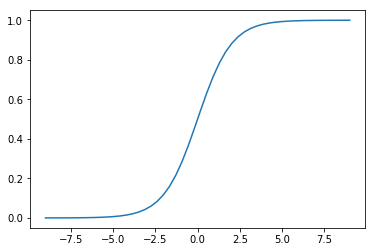

In [3]:
xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

0.000123379349765
0.25
0.000123379349765


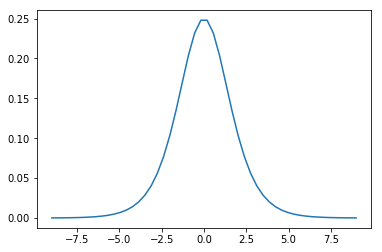

In [4]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

print(sigmoid_derivative(-9))
print(sigmoid_derivative(0))
print(sigmoid_derivative(+9))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### Automatic Differenciation

In [5]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y

        return self.x * self.y
    
    def backward(self):
        return self.y, self.x
        
    
multiply = Multiply()
print(multiply.forward(2, 3))
print(multiply.backward())

6
(3, 2)


In [6]:
class Exp:
    def forward(self, x):
        self.x = x

        return np.exp(self.x)
    
    def backward(self):
        return np.exp(self.x)

exp = Exp()
print(exp.forward(0))
print(exp.backward())

1.0
1.0


In [7]:
class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y

        return self.x + self.y
    
    def backward(self):
        return 1, 1

add = Add()
print(add.forward(2, 3))
print(add.backward())

5
(1, 1)


In [8]:
class Flip:
    def forward(self, x):
        self.x = x

        return 1 / self.x
    
    def backward(self):
        return -1.0 / (self.x ** 2)

flip = Flip()
print(flip.forward(2))
print(flip.backward())

0.5
-0.25


In [9]:
x = +9

multiply = Multiply()
exp = Exp()
add = Add()
flip = Flip()

forward1 = multiply.forward(x, -1)
forward2 = exp.forward(forward1)
forward3 = add.forward(forward2, 1)
forward4 = flip.forward(forward3)

forward4 == sigmoid(9)

True

In [10]:
backward1 = flip.backward()
backward2 = backward1 * add.backward()[0]
backward3 = backward2 * exp.backward()
backward4 = backward3 * multiply.backward()[0]

round(backward4, 5) == round(sigmoid_derivative(9), 5)

True